In [4]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_community.tools import TavilySearchResults
from typing import TypedDict, Annotated
from langgraph.graph import add_messages, StateGraph, END
from dotenv import load_dotenv
from langgraph.prebuilt import ToolNode

load_dotenv()

class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

search_tool = TavilySearchResults(max_results=2)
tools = [search_tool]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools=tools)

def model(state: AgentState):
    return {
        "messages": [llm_with_tools.invoke(state["messages"])], 
    }

def tools_router(state: AgentState):
    last_message = state["messages"][-1]

    if(hasattr(last_message, "tool_calls") and len(last_message.tool_calls) > 0):
        return "tool_node"
    else: 
        return "end"
    

tool_node = ToolNode(tools=tools)

graph = StateGraph(AgentState)

graph.add_node("model", model)
graph.add_node("tool_node", tool_node)
graph.set_entry_point("model")

graph.add_conditional_edges("model", tools_router, {"tool_node": "tool_node", "end": END})
graph.add_edge("tool_node", "model")

app = graph.compile()

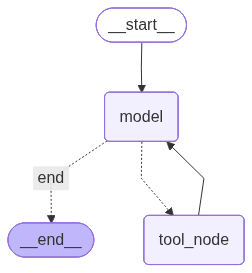

In [5]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [8]:
input = {
    "messages": ["What's the current weather in Sao Paulo?"]
}

events = app.stream(input=input, stream_mode="values")

for event in events: 
    print(event)


{'messages': [HumanMessage(content="What's the current weather in Sao Paulo?", additional_kwargs={}, response_metadata={}, id='e061e82d-2695-4f8c-9b8a-94ad5f410192')]}
{'messages': [HumanMessage(content="What's the current weather in Sao Paulo?", additional_kwargs={}, response_metadata={}, id='e061e82d-2695-4f8c-9b8a-94ad5f410192'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Ff07AJGRp5Ob5a0Xb6LIe8Bi', 'function': {'arguments': '{"query":"current weather in Sao Paulo"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 87, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CM6IEphxolQO52z4sG0UEL

In [9]:
input = {
    "messages": ["What's the current weather in Sao Paulo?"]
}

events = app.stream(input=input, stream_mode="updates")

for event in events: 
    print(event)


{'model': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_TYWa7T29qxoHzY3L6NA286E3', 'function': {'arguments': '{"query":"current weather in Sao Paulo"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 87, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CM6IQ9erm94Dlig1Z5ppr5KvIPB4g', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--027bc21e-332d-413a-8f5b-b9791e560eb9-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current weather in Sao Paulo'}, 'id': 'call_TYWa7T29qxoHzY3L6NA286E3', 'type': 'tool_call'}], usage_meta

In [10]:
input = {
    "messages": ["Hello. What is The Legend of Zelda?"]
}

events = app.astream_events(input=input, version="v2")

async for event in events: 
    if event["event"] == "on_chat_model_stream":
        print(event["data"]["chunk"].content, end="", flush=True)

"The Legend of Zelda" is a highly acclaimed and influential video game franchise created by Japanese game designers Shigeru Miyamoto and Takashi Tezuka. Developed and published by Nintendo, the series debuted in 1986 with the release of "The Legend of Zelda" for the Nintendo Entertainment System (NES). The franchise is notable for its mix of action, adventure, puzzle-solving, and exploration elements.

Key elements of the series include:

- **Plot and Setting**: The series typically follows the protagonist, Link, on a quest to rescue Princess Zelda and defeat the main antagonist, Ganon, to save the kingdom of Hyrule. The games often involve the Triforce, a sacred relic composed of three pieces representing power, courage, and wisdom.

- **Gameplay**: "The Legend of Zelda" combines exploration, puzzles, and combat. Players navigate dungeons, solve puzzles, defeat enemies, and find items necessary for progression.

- **Influence and Legacy**: The franchise has significantly influenced th